# EDA & PROCESSING

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#set path for rawdata
raw_data_path   = os.path.join(os.path.pardir,"data","raw")
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path  = os.path.join(raw_data_path,'test.csv')

In [5]:
train_df = pd.read_csv(train_file_path,index_col = "PassengerId")
test_df  = pd.read_csv(test_file_path,index_col = "PassengerId")

In [7]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


*****************************   

#### age&cabin column has most no.of missing values
#### Embarked and Fare col has 2,1 missing values respectively.

*****************************   

# DATA EXPLORATION

In [11]:
test_df['Survived'] = -888 #since test_df doesnt hv survived column

In [13]:
df = pd.concat((train_df,test_df))

C:\Users\LOCALGHOST\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [15]:
df.isna().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

#note missing values above

In [17]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [19]:
male_psgs = df[df['Sex']=='male']
print("No. of Male Passengers : {}".format(len(male_psgs)))

No. of Male Passengers : 843


In [22]:
female_psgs = df[df.Sex == 'female']
print("No. of Female Passengers = {}".format(len(female_psgs)))

No. of Female Passengers = 466


In [34]:
class1 = len(df[df['Pclass']==1])
class2 = len(df[df['Pclass']==2])
class3 = len(df[df['Pclass']==3])
print("Class Details:")
print("First Class : {}\nSecond Class : {}\nThird Class : {} \nTotal : {}".format(class1,class2,class3,sum([class1,class2,class3])))

Class Details:
First Class : 323
Second Class : 277
Third Class : 709 
Total : 1309


Percentage of first class


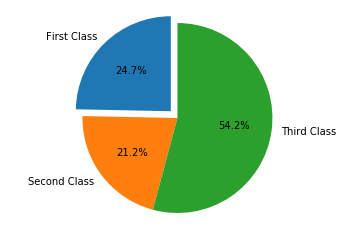

In [39]:
print("Percentage of first class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [class1,class2,class3]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Percentage: Gender


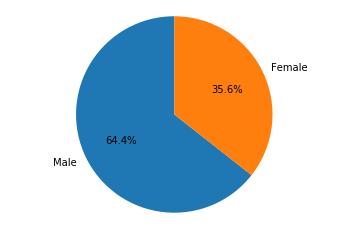

In [41]:
print("Percentage: Gender")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [len(male_psgs),len(female_psgs)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

% Female Passenger Class


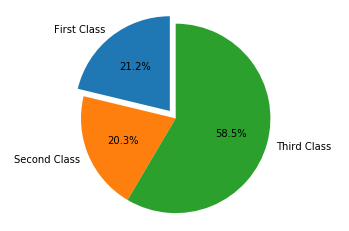

In [53]:
print("% Female Passenger Class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [
            len(df[(df['Sex']=='male') & (df['Pclass']==1)]),
            len(df[(df['Sex']=='male') & (df['Pclass']==2)]),
            len(df[(df['Sex']=='male') & (df['Pclass']==3)])
        ]

explode = (0.1, 0, 0)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

% Female Passenger Class


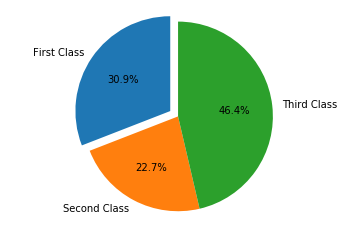

In [54]:
print("% Female Passenger Class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [
            len(df[(df['Sex']=='female') & (df['Pclass']==1)]),
            len(df[(df['Sex']=='female') & (df['Pclass']==2)]),
            len(df[(df['Sex']=='female') & (df['Pclass']==3)])
        ]

explode = (0.1, 0, 0)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

******************************* 

# SUMMARY STATISTICS

*******************************

### Numerical Features

In [55]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


include findings : 
    - 
    - 

#### Summary Stats Manually

In [64]:
print("Mean Fare : {} \nMedian Fare : {} \nMax Fare : {} \nMin Fare : {} \n"
      .format(df.Fare.mean(),df.Fare.median(),df.Fare.max(),df.Fare.min()))

Mean Fare : 33.2954792813456 
Median Fare : 14.4542 
Max Fare : 512.3292 
Min Fare : 0.0 



Quantiles : 
    `

In [66]:
print("Fare 25 percentile : {}".format(df.Fare.quantile(.25)))
print("Fare 50 percentile : {}".format(df.Fare.quantile(.50)))
print("Fare 75 percentile : {}".format(df.Fare.quantile(.75)))

Fare 25 percentile : 7.8958
Fare 50 percentile : 14.4542
Fare 75 percentile : 31.275


Disperson:

In [68]:
print("Fare Range : {}".format(df.Fare.max() - df.Fare.min()))
print("Fare Variance : {}".format(df.Fare.var()))
print("Fare Standard Deviation : {}".format(df.Fare.std()))

Fare Range : 512.3292
Fare Variance : 2678.959737892894
Fare Standard Deviation : 51.75866823917414


Whisker & Box Plot

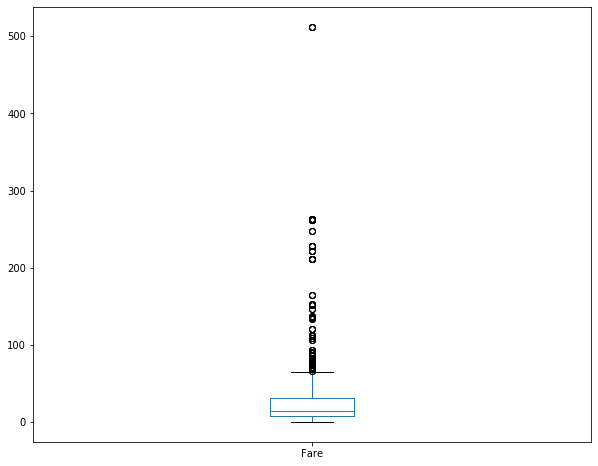

In [73]:
df.Fare.plot(kind='box' ,figsize = (10,8))
plt.show()

to include categorical variables stats use :

In [75]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


check diff and add findings below:
    - 
    - 
    - 

### Categorical Statistics

In [77]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [88]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

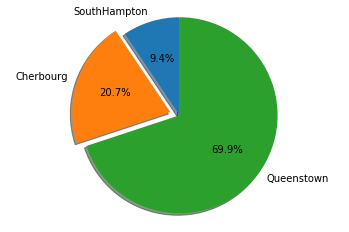

In [87]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SouthHampton', 'Cherbourg', 'Queenstown'
sizes = [
            df.Embarked.value_counts()[0],
            df.Embarked.value_counts()[1],
            df.Embarked.value_counts()[2]
        ]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sorted(sizes), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [95]:
df[~(df.Survived == (-888))]['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [96]:
df[~(df.Survived == (-888))]['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [112]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

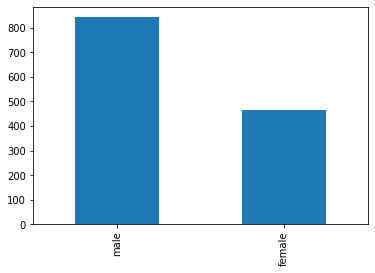

In [111]:
df.Sex.value_counts().plot(kind='bar')

In [98]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [99]:
df.Pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

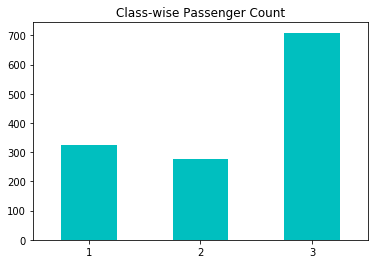

In [113]:
df.Pclass.value_counts().sort_index().plot(kind='bar',rot=0,title="Class-wise Passenger Count",color="c")

#### Distribution

- <u>Univariate:</u>
    - Distribution of One Feature : Use : 
        - Kernel Density Estimation(KDE) plot
        - Histogram
- <u>Bivariate:</u>
    - Distribution of Two Features : Use : 
        - Scatter-plots

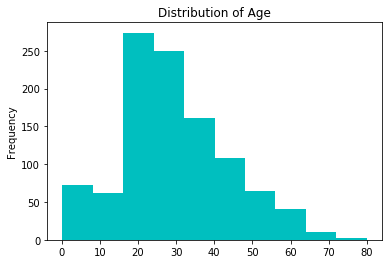

In [115]:
df.Age.plot(kind="hist",title= "Distribution of Age", color= "c")

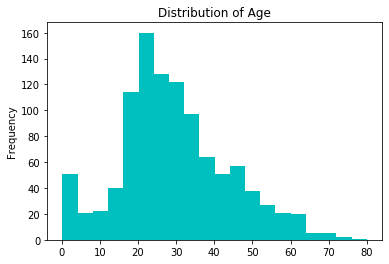

In [116]:
df.Age.plot(kind="hist",title= "Distribution of Age", color= "c", bins=20)

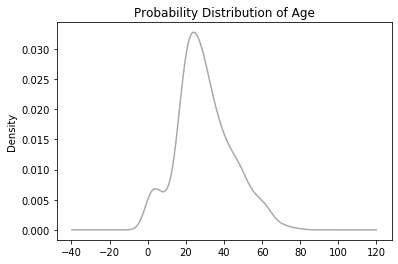

In [126]:
df.Age.plot(kind="kde",title= "Probability Distribution of Age", color= "darkgrey")

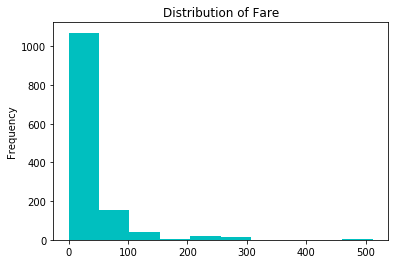

In [127]:
df.Fare.plot(kind="hist",title= "Distribution of Fare", color= "c")

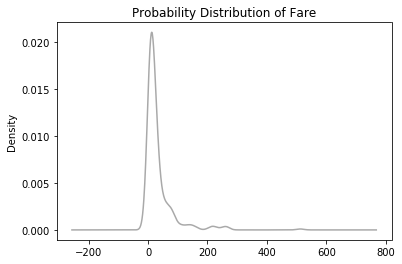

In [125]:
df.Fare.plot(kind="kde",title= "Probability Distribution of Fare", color= "darkgrey")

skewness = 0 : normally distributed.   
skewness > 0 : more weight in the left tail of the distribution.   
skewness < 0 : more weight in the right tail of the distribution.    

In [129]:
print("Skewness for Age\t: {} \nSkewness for Fare\t: {} ".format(df.Age.skew(),df.Fare.skew()))

Skewness for Age	: 0.40767455974362266 
Skewness for Fare	: 4.367709134122922 


***** 
<u>Bivariate</u>

- Scatterplot

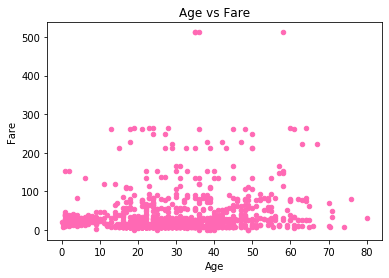

In [150]:
df.plot.scatter(x = 'Age', y = "Fare" ,color = "hotpink", title = "Age vs Fare" )

doesn't have any interesting patterns :
 - As age gets higher, there is not much significant change in fare

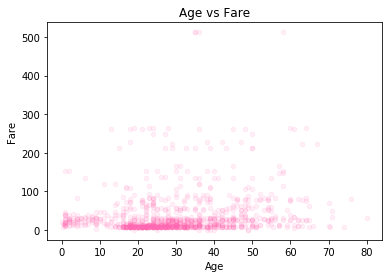

In [151]:
#since above diagram has lots of values cluttered & overlapped : use alpha
df.plot.scatter(x = 'Age', y = "Fare" ,color = "hotpink", title = "Age vs Fare" ,alpha = 0.1)

mostcrowded zone will get highlighted

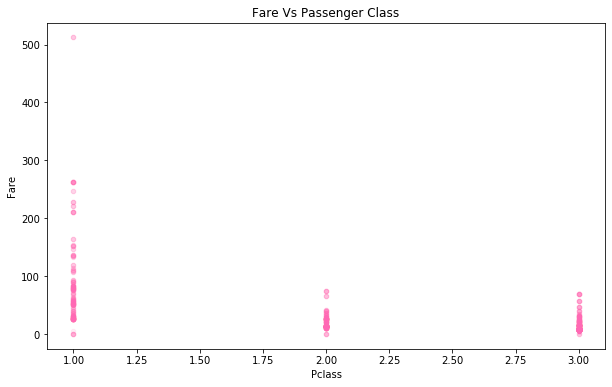

In [159]:
df.plot.scatter(x="Pclass",y="Fare" , title= "Fare Vs Passenger Class", color = "hotpink",alpha=0.1,figsize = (10,6) )

here, we can see that a lot of first class passengers paid fare below 100.   
They might have booked tickets earlier or they got some discount.   

## GROUPING

In [167]:
df.groupby('Sex')['Fare','Age'].mean()

,Fare,Age
Sex,,
female,46.198097,28.687088
male,26.154601,30.585228


In [164]:
df.groupby('Sex')['Fare','Age'].median()

,Fare,Age
Sex,,
female,23.0000,27.0
male,11.8875,28.0


In [165]:
df.groupby('Pclass')['Fare','Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [166]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


Here Median Makes Sense w.r.t the earlier scatter plot insight.

In [170]:
df.groupby(['Sex','Pclass'])['Sex'].count()

Sex     Pclass
female  1         144
        2         106
        3         216
male    1         179
        2         171
        3         493
Name: Sex, dtype: int64

From the above result:
    - Very high no. of male passengers were having 3rd class tickets
    - Same for female passengers , even though that is not as significant as it is for Male.
    - First class comprised of more people than 2nd class.

#### Aggregation

In [172]:
df.groupby('Sex')["Fare","Age"].agg({'Age':'median','Fare':'mean'})

,Age,Fare
Sex,,
female,27.0,46.198097
male,28.0,26.154601


In [192]:
# lets check complex aggregation functions
aggregations = {
    'Age' : {
        'Avg-age':'median',
        'highest-age': max,
        'lowest-age': min,
        'age-range' : lambda x : max(x) - min(x)
    }, 
    'Fare' : {
        'Avg-Fare':'mean',
        'Median-Fare' : 'median',
        'highest-Fare' : max,
        'lowest-Fare' : min,
        'Fare-range' : lambda x : max(x) - min(x)
    }
}

In [197]:
df.groupby('Pclass').agg(aggregations)

Age                                        Fare              \
       Avg-age highest-age lowest-age age-range   Avg-Fare Median-Fare   
Pclass                                                                   
1         39.0        80.0       0.92     79.08  87.508992     60.0000   
2         29.0        70.0       0.67     69.33  21.179196     15.0458   
3         24.0        74.0       0.17     73.83  13.302889      8.0500   

                                            
       highest-Fare lowest-Fare Fare-range  
Pclass                                      
1          512.3292         0.0   512.3292  
2           73.5000         0.0    73.5000  
3           69.5500         0.0    69.5500

In [194]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [195]:
df.groupby(['Pclass','Embarked']).Fare.count()

Pclass  Embarked
1       C           141
        Q             3
        S           177
2       C            28
        Q             7
        S           242
3       C           101
        Q           113
        S           494
Name: Fare, dtype: int64

In [196]:
df.groupby(['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

#### Crosstabs

In [200]:
pd.crosstab(df.Sex,df.Pclass) #unlike groupby , it takes count

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


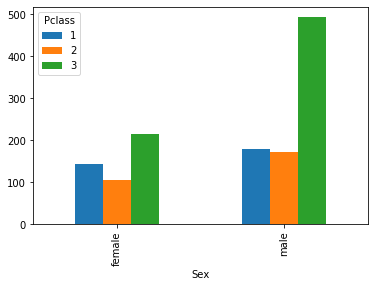

In [201]:
pd.crosstab(df.Sex,df.Pclass).plot(kind = 'bar')